# Домашнее задание

Задание 1
- Откройте архив погоды города Москва за 2018 г. В csv файле заголовок начинается с 6 строки. Это нужно как-то обработать. (см. тетрадку выше, там был пример)
- Считайтей даты и температуру ( вам нужны 1 и 2 столбцы )
- Постройте диаграмму максимальных и минимальных температурных значений по дням. Для этого вам нужно будет для каждого дня находить минимум и максимум, иными словами провести группировку по дню. вам понадобится df.groupby()
- Посчитайте все основные статистики(среднее, медиана, мода, стандартное отклонение)

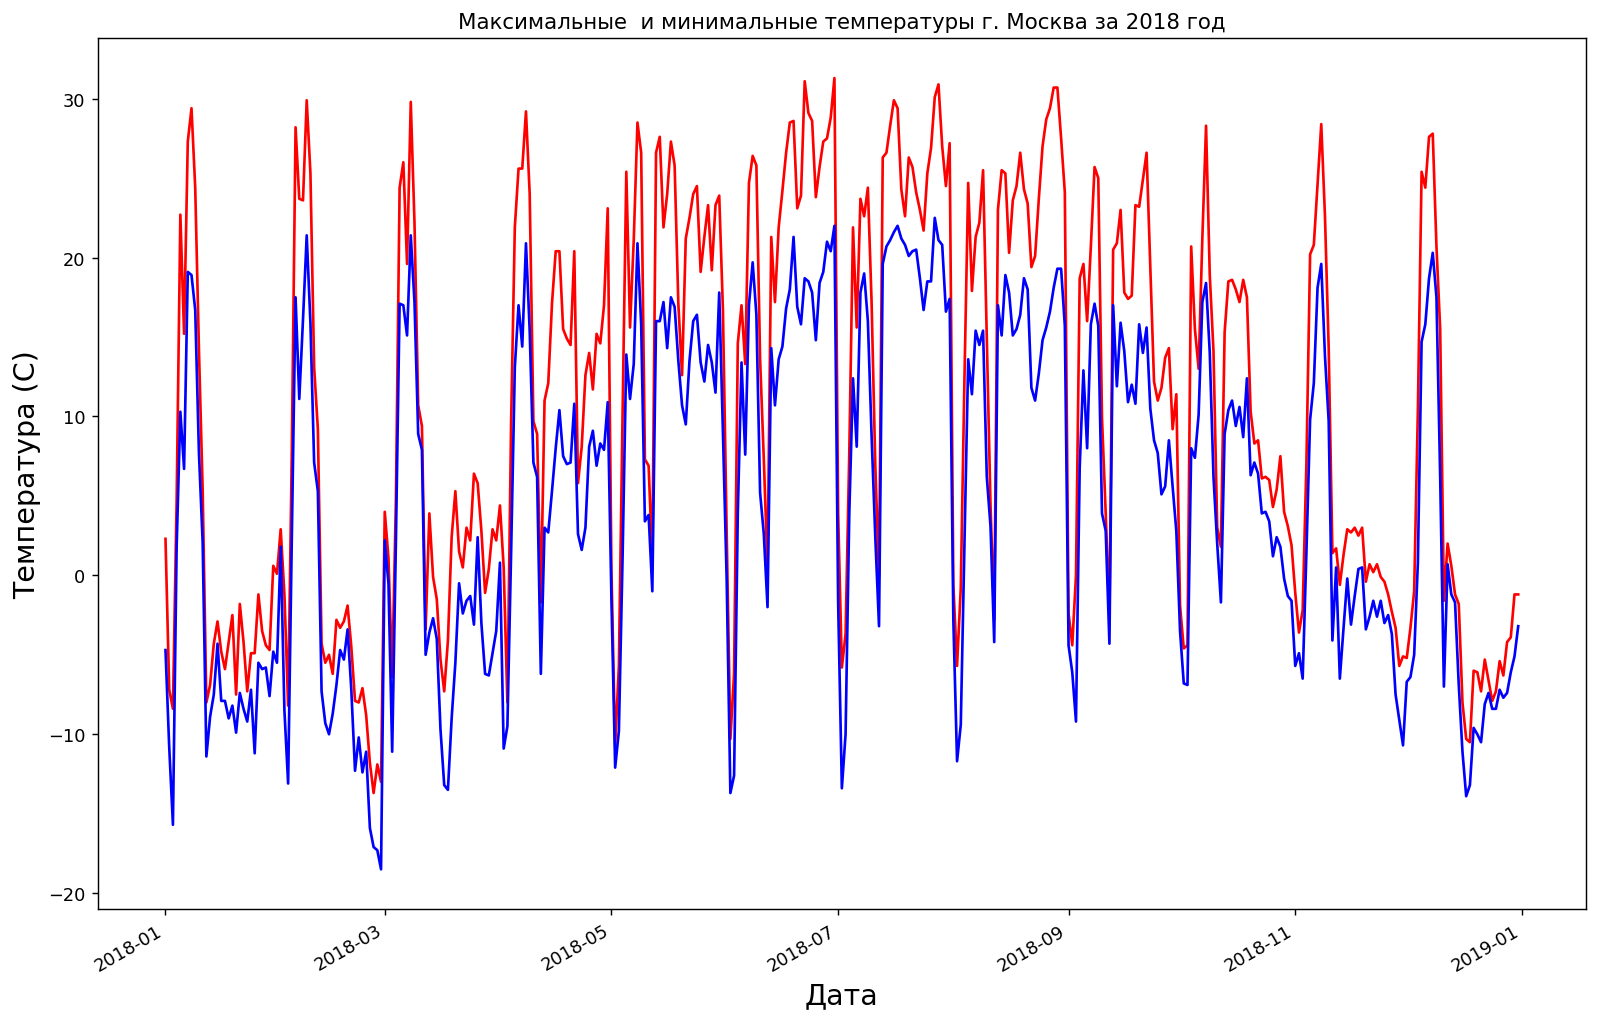

Среднее максимальных температур = 10.95534246575342
Стандартное отклонение максимальных температур = 12.60561776062167
Мода максимальных температур = 0    -1.2
1    26.6
dtype: float64
Медиана максимальных температур = 11.8
Среднее минимальных температур = 5.01835616438356
Стандартное отклонение минимальных температур = 10.675283022948443
Мода минимальных температур = 0    15.8
1    17.0
dtype: float64
Медиана минимальных температур = 6.2


In [22]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
from datetime import datetime
import pandas as pd

arxiv = pd.read_csv('Moscow_2018.csv', 
            skiprows = 6, #используем чтение с 6 строки
            delimiter = ';', # разделитель столбцов
            header = 0, # заголовком считать строку с 0 индексом 
            index_col = False,
            usecols = ['Местное время в Москве (центр, Балчуг)','T'],
            parse_dates = ['Местное время в Москве (центр, Балчуг)']
            )



a = [] #создаем пустой список
#далее избавляемся от формата даты, где присутствует время
for row in arxiv['Местное время в Москве (центр, Балчуг)']:
    rows  = datetime.strptime(str(row), '%Y-%m-%d %H:%M:%S').date()
    a.append(rows)
arxiv['Дата'] = a #создаем удобный для работы формат столбца
arxiv.drop(['Местное время в Москве (центр, Балчуг)'],axis=1,inplace=True)#удаляем ненужный столбец


#группируем по Дате 
max_t = arxiv.groupby(['Дата']).max()
min_t = arxiv.groupby(['Дата']).min()

#рисуем график
fig = plt.figure(dpi=128,figsize=(15,10))
plt.plot(max_t.index, max_t, c = 'red')
plt.plot(min_t.index, min_t, c = 'blue')
plt.title("Максимальные  и минимальные температуры г. Москва за 2018 год")
plt.xlabel('Дата', fontsize = 16)
fig.autofmt_xdate() 
plt.ylabel('Температура (C)', fontsize = 16)
plt.show()

#находим основные характеристики

#для максимальных температур
medium_of_max = max_t['T'].mean() #среднее
print('Среднее максимальных температур =',medium_of_max)
std_of_max = max_t['T'].std() #стандартное отклонение
print('Стандартное отклонение максимальных температур =',std_of_max)
moda_of_max = max_t['T'].mode() #мода
print('Мода максимальных температур =',moda_of_max)
mediana_of_max = max_t['T'].median() #медиана
print('Медиана максимальных температур =',mediana_of_max)

#для минимальных температур
medium_of_min = min_t['T'].mean() #среднее
print('Среднее минимальных температур =',medium_of_min)
std_of_min = min_t['T'].std() #стандартное отклонение
print('Стандартное отклонение минимальных температур =',std_of_min)
moda_of_min = min_t['T'].mode() #мода
print('Мода минимальных температур =',moda_of_min)
mediana_of_min = min_t['T'].median() #медиана
print('Медиана минимальных температур =',mediana_of_min)


Задание 2
- Сохраните следующие несколько строк в файл books.csv. Обратите внимание на то, что, если поля разделены запятыми, вам нужно заключить поле в кавычки, если оно содержит запятую:
      author,book
      J R R Tolkien,The Hobbit
      Lynne Truss,"Eats, Shoots & Leaves"

In [23]:
my_first_csv = """author,book
J R R Tolkien,The Hobbit
Lynne Truss,"Eats, Shoots & Leaves" """
with open('books.csv', 'w') as one:
    one.write(my_first_csv)

Задание 3
- Используйте модуль csv и его метод DictReader, чтобы считать содержимое файла books.csv в переменную books. Выведите на экран значения переменной books. Обработал ли метод DictReader кавычки и запятые в заголовке второй книги?

In [24]:
books = 'books.csv' #имя обрабатываемого файла сохраняем в переменную
with open(books) as two:
    read_books = csv.DictReader(two)
    for line in read_books:
        print(line)
#Метод DictReader обработал кавычки и запятые

OrderedDict([('author', 'J R R Tolkien'), ('book', 'The Hobbit')])
OrderedDict([('author', 'Lynne Truss'), ('book', 'Eats, Shoots & Leaves ')])


Задание 4
- Гостевая книга: напишите цикл while, который в цикле запрашивает у пользователей имена . При вводе каждого имени выведите на экран приветствие и добавьте строку с со- общением в файл с именем guest_book .txt . Проследите за тем, чтобы каждое сообщение размещалось в отдельной строке файла .

In [25]:
x = input("Введите имя: ")#Считываем с клавиатуры имя
while x:
    with open('guest_book .txt', 'a') as guest:#файл в режиме дозаписи
        welcome = 'Гость - ' #переменная для записи в гостувую книгу
        print('Welcome,',x)
        for line in x:
            guest.write(welcome+x)
            guest.write('\n')#добавляем для записи в отдельную строку
    x = input("Введите имя: ")


Введите имя: Евгений
Welcome, Евгений
Введите имя: John
Welcome, John
Введите имя: Jack
Welcome, Jack
Введите имя: 


Задание 5
- Откройте пустой файл в текстовом редакторе и напишите несколько строк текста о возможностях Python . Каждая строка должна начинаться с фразы: «In Python you can...» Сохраните файл под именем learning_python.txt в каталоге. Напишите программу, которая читает файл и выводит текст три раза: 
1)с чтением всего файла 
2)с перебором строк объекта файла 
3)с сохранением строк в списке с последующим выводом списка вне блока with

In [26]:
#Чтение всего файла целиком
with open('learning_python.txt', 'r') as first_read:
    reading = first_read.read()
    print('\033[1m'+'Чтение всего файла целиком:')
    print('\033[0m'+reading)     
    print()

#Чтение файла с перебором строк
with open('learning_python.txt', 'r') as second_read:
    print('\033[1m'+'Чтение файла с перебором строк:')
    for line_1 in second_read:
        line_1 = line_1.strip()
        print('\033[0m'+line_1)
print()

#Чтение с сохранением строк в списке
new_my_list = []
with open('learning_python.txt', 'r') as third_read:
    print('\033[1m'+'Чтение с сохранением строк в списке:')
    print('\033[0m',end ='')
    for line_3 in third_read:
        new_my_list.append(line_3)
    new_my_list = [line.rstrip() for line in new_my_list]
print(new_my_list) 

Чтение всего файла целиком:
In Python you can say “Hello World!” to Machine Learning
In Python you can to calculate any values
In Python you can to parse websites
In Python you can to create applications
In Python you can analyze data

Чтение файла с перебором строк:
In Python you can say “Hello World!” to Machine Learning
In Python you can to calculate any values
In Python you can to parse websites
In Python you can to create applications
In Python you can analyze data

Чтение с сохранением строк в списке:
['In Python you can say “Hello World!” to Machine Learning', 'In Python you can to calculate any values', 'In Python you can to parse websites', 'In Python you can to create applications', 'In Python you can analyze data']
